In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
import pandas as pd

# Chargement des données
df = pd.read_csv('/kaggle/input/nyse/prices.csv')  # Assurez-vous que le fichier est bien disponible

# Affichage des premières lignes
print(df.head())

# Informations sur le dataset
print(df.info())

# Statistiques descriptives
print(df.describe())


                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volu

<ipython-input-18-a89a259bec04>:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


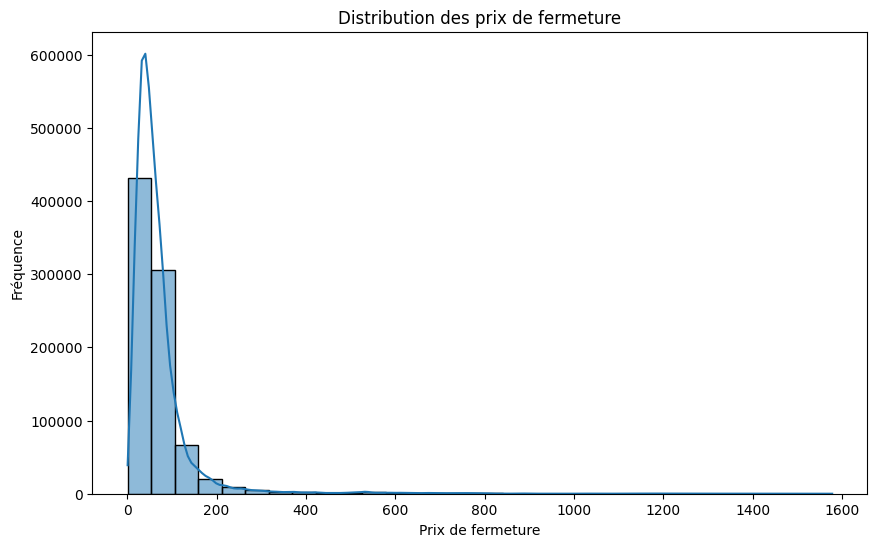

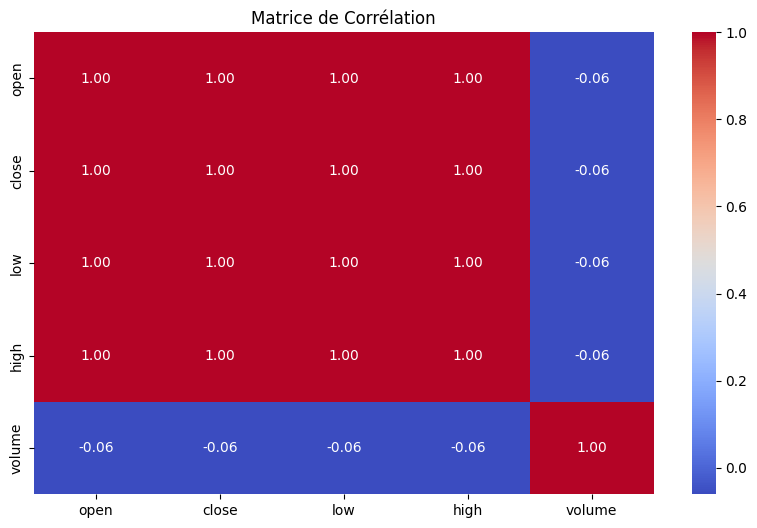

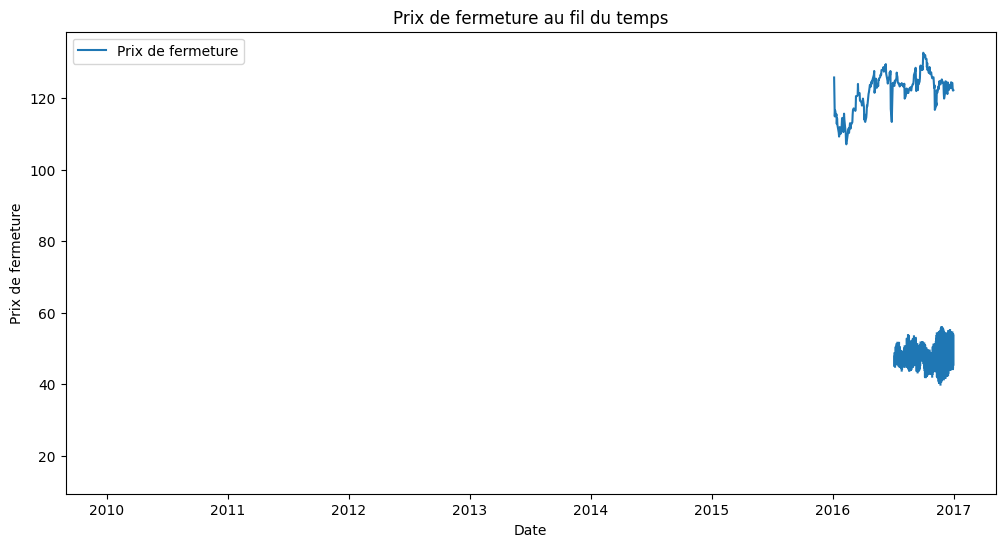

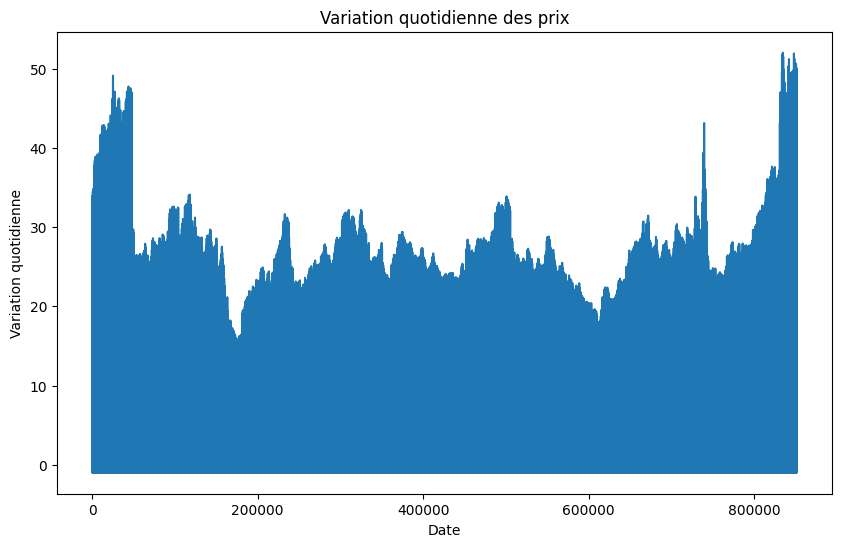

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df = pd.read_csv('/kaggle/input/nyse/prices.csv')

# Assurez-vous que la colonne 'date' est bien formatée
if 'date' in df.columns:
    # Tenter de convertir les dates avec format ISO8601 (en incluant l'option 'coerce' pour ignorer les erreurs)
    df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)

# Filtrage des colonnes numériques uniquement pour la corrélation
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Visualisation de la distribution des prix de fermeture
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=30, kde=True)  # Histogramme pour la colonne 'close'
plt.title("Distribution des prix de fermeture")
plt.xlabel('Prix de fermeture')
plt.ylabel('Fréquence')
plt.show()

# Visualisation de la corrélation entre les colonnes numériques
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

# Visualisation des prix de fermeture au fil du temps (graphe temporel)
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Prix de fermeture')
plt.title("Prix de fermeture au fil du temps")
plt.xlabel('Date')
plt.ylabel('Prix de fermeture')
plt.legend()
plt.show()

# Visualisation de la variation quotidienne des prix (taux de variation)
df['daily_return'] = df['close'].pct_change()  # Calcul du taux de variation
plt.figure(figsize=(10, 6))
df['daily_return'].plot()
plt.title("Variation quotidienne des prix")
plt.xlabel('Date')
plt.ylabel('Variation quotidienne')
plt.show()


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supposons qu'on prédise 'close' en fonction des autres colonnes numériques
features = df_numeric.drop(columns=['close'], errors='ignore')  # X
target = df_numeric['close']  # y

# Suppression des NaN s'il y en a
features = features.fillna(0)
target = target.fillna(0)

# Division en train et test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Conversion en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [69]:
# Architecture de base
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.network(x)

# Initialisation du modèle
input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)


In [70]:
# Hyperparamètres
learning_rate = 0.001
epochs = 30
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
test_losses = []

for epoch in range(epochs):
    # Entraînement
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Évaluation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)

    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")


Epoch [10/30], Train Loss: 11959.7402, Test Loss: 11916.7656
Epoch [20/30], Train Loss: 11877.9873, Test Loss: 11832.9326
Epoch [30/30], Train Loss: 11766.6436, Test Loss: 11718.6543


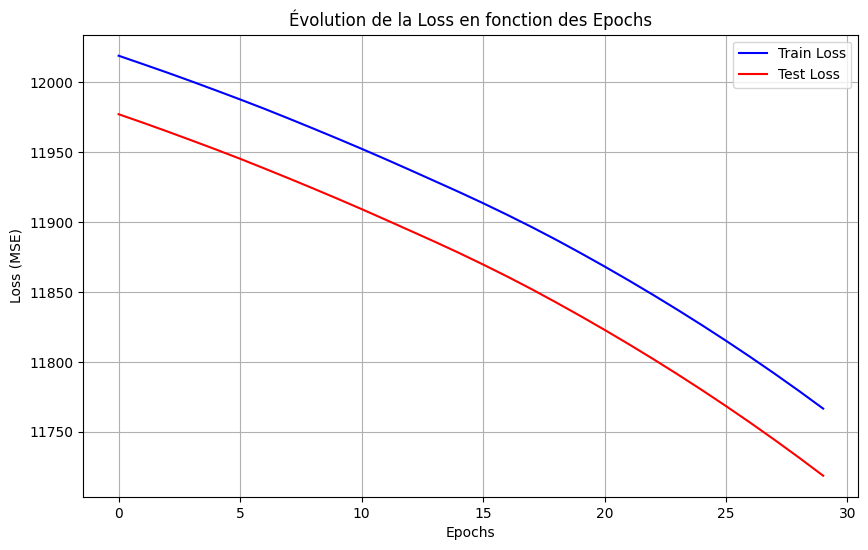

In [71]:
# Affichage du graphe Loss vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
plt.plot(range(epochs), test_losses, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Évolution de la Loss en fonction des Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
from sklearn.base import BaseEstimator, RegressorMixin

class TorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_size1=64, hidden_size2=32, learning_rate=0.001, epochs=100, optimizer_fn=optim.Adam):
        self.input_dim = input_dim
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.optimizer_fn = optimizer_fn
        self.model = None
        
    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        self.model = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_size1),
            nn.ReLU(),
            nn.Linear(self.hidden_size1, self.hidden_size2),
            nn.ReLU(),
            nn.Linear(self.hidden_size2, 1)
        )

        criterion = nn.MSELoss()
        optimizer = self.optimizer_fn(self.model.parameters(), lr=self.learning_rate)

        for epoch in range(self.epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

        return self
    
    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(X_tensor)
        return predictions.numpy().flatten()


In [74]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester
param_grid = {
    'hidden_size1': [64, 128],
    'hidden_size2': [32, 64],
    'learning_rate': [0.001, 0.0001],
    'epochs': [30, 50],
    'optimizer_fn': [optim.Adam, optim.SGD]
}

# Lancer GridSearchCV
torch_regressor = TorchRegressor(input_dim=X_train_tensor.shape[1])
grid_search = GridSearchCV(torch_regressor, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit sur les données
grid_search.fit(X_train_scaled, y_train.values)

# Meilleurs paramètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)


Meilleurs hyperparamètres: {'epochs': 50, 'hidden_size1': 128, 'hidden_size2': 32, 'learning_rate': 0.0001, 'optimizer_fn': <class 'torch.optim.sgd.SGD'>}


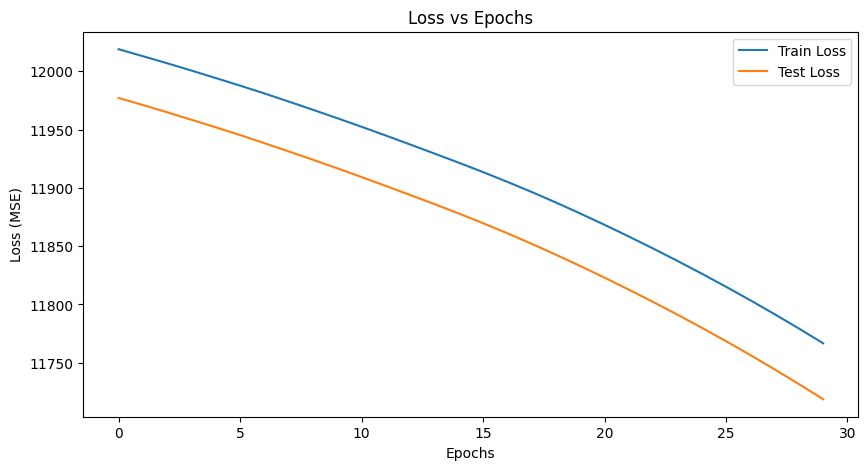

In [75]:
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Définir un modèle avec Dropout
class RegularizedRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegularizedRegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout ajouté
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout ajouté
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        return self.network(x)

# Initialisation du modèle avec régularisation
input_dim = X_train_tensor.shape[1]
model = RegularizedRegressionModel(input_dim)

# Hyperparamètres
learning_rate = 0.001
epochs = 50
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  # Weight Decay

# Suivi des pertes
train_losses = []
test_losses = []

# Entraînement du modèle
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Prédictions et calcul de la loss sur le train set
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Évaluation sur le test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)

    # Stocker les valeurs de perte
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    # Affichage toutes les 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")



Epoch [10/50] | Train Loss: 11922.3037 | Test Loss: 11867.9824
Epoch [20/50] | Train Loss: 11709.2451 | Test Loss: 11647.3340
Epoch [30/50] | Train Loss: 11397.4199 | Test Loss: 11324.5967
Epoch [40/50] | Train Loss: 10952.4082 | Test Loss: 10866.2510
Epoch [50/50] | Train Loss: 10338.7070 | Test Loss: 10234.7432


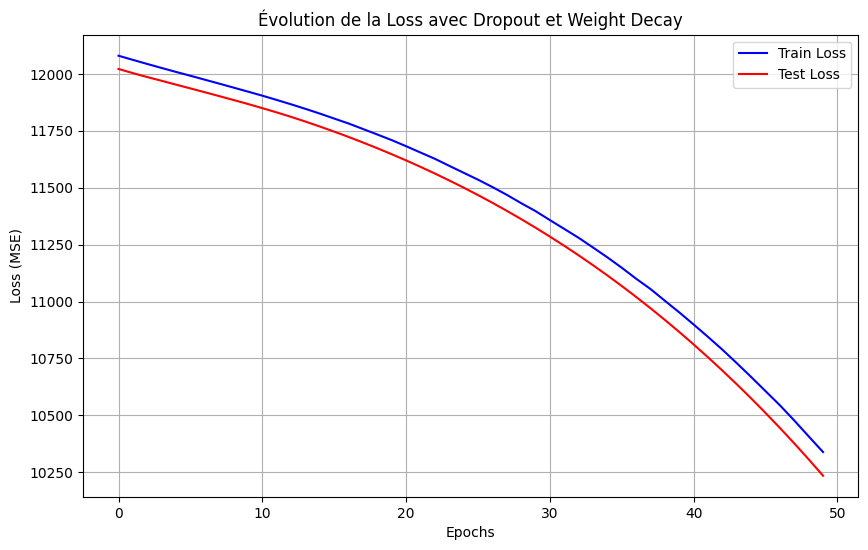

In [81]:
# Visualisation du graphe Loss vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
plt.plot(range(epochs), test_losses, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Évolution de la Loss avec Dropout et Weight Decay')
plt.legend()
plt.grid(True)
plt.show()
